# Assignment 3

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Task 1: MLE computation

As you know, we can think about linear regression from the optimization point of view (as the problem of minimizing the root mean squared error), but we can also consider it from the probabilistic point of view.
Let's consider the following equation:

\begin{equation*}
y_i=x_i B_0+\varepsilon_i
\end{equation*}

where $y_i$ is the dependent variable, $x_i$ is a $1 \times K$ vector of regressors, $\beta_0$ is the $K \times 1$ vector of regression coefficients to be estimated and $\varepsilon_i$ is an unobservable error term.

The sample is made up of $N$ IID observations $\left(y_i, x_i\right)$.
The regression equations can be also written as

\begin{equation*}
y=X \beta_0+\varepsilon
\end{equation*}

where the $N \times 1$ vector of observations of the dependent variable is denoted by $y$, the $N \times K$ matrix of regressors is denoted by $X$, and the $N \times 1$ vector of error terms is denoted by $\varepsilon$.

As everybody interested in probability theory knows, we always have to have some assumptions. In this case, we assume that the vector of errors $\varepsilon$ has a multivariate normal distribution conditional on $x$, with mean equal to 0 and covariance matrix equal to

\begin{equation*}
\sigma_0^2 I
\end{equation*}

where $l$ is the $N \times N$ identity matrix and

\begin{equation*}
\sigma_0^2=\operatorname{Var}\left[\varepsilon_i \mid X\right]
\end{equation*}

is the second parameter to be estimated.
Furthermore, it is assumed that the matrix of regressors $x$ has full-rank.

Those assumptions have interesting implications:
- the covariance matrix of $\varepsilon$ is diagonal implies that the entries of $\varepsilon$ are mutually independent (i.e., $\varepsilon_i$ is independent of $\varepsilon_j$ for $i \neq j$.)
- they all have a normal distribution with mean 0 and variance $\sigma_0^2$.

The fact that we transform normal random variables linearly makes the dependent variable $y_i$ conditionally normal, with mean $x_i \beta_0$ and variance $\sigma_0^2$. Therefore, its cdf is

\begin{equation*}
f_Y\left(y_i \mid X\right)=\left(2 \pi \sigma_0^2\right)^{-1 / 2} \exp \left(-\frac{1}{2} \frac{\left(y_i-x_i \beta_0\right)^2}{\sigma_0^2}\right)
\end{equation*}

Having this probability model we can use it to do estimation of regression parameters using Maximum Likelihood Estimation method.

The first-order conditions for a maximum are

\begin{equation*}
\begin{aligned}
& \nabla_\beta l\left(\beta, \sigma^2 ; y, X\right)=0 \\
& \frac{\partial}{\partial \sigma^2} l\left(\beta, \sigma^2 ; y, X\right)=0
\end{aligned}
\end{equation*}

where $\nabla_\beta$ indicates the gradient calculated with respect to $\beta$, that is, the vector of the partial derivatives of the log-likelihood with respect to the entries of $\beta$. The gradient is

\begin{equation*}
\begin{aligned}
& \nabla_\beta l\left(\beta, \sigma^2: y, X\right) \\
= & \nabla_\beta\left(-\frac{N}{2} \ln (2 \pi)-\frac{N}{2} \ln \left(\sigma^2\right)-\frac{1}{2 \sigma^2} \sum_{i=1}^N\left(y_i-x_i \beta\right)^2\right) \\
= & \frac{1}{\sigma^2} \sum_{i=1}^N x_i^{\top}\left(y_i-x_i \beta\right) \\
= & \frac{1}{\sigma^2}\left(\sum_{i=1}^N x_i^{\top} y_i-\sum_{i=1}^N x_i^{\top} x_i \beta\right)
\end{aligned}
\end{equation*}

which is equal to zero only if

\begin{equation*}
\sum_{i=1}^N x_i^{\top} y_i-\sum_{i=1}^N x_i^{\top} x_i \beta=0
\end{equation*}


Therefore, the first of the two equations is satisfied if

\begin{equation*}
\beta=\left(\sum_{i=1}^N x_i^{\top} x_i\right)^{-1} \sum_{i=1}^N x_i^{\top} y_i=\left(X^{\top} X\right)^{-1} X^{\top} y
\end{equation*}

where we have used the assumption that $x$ has full rank and, as a consequence, $x^x x$ is invertible.


### Subtask A:
Prove that the MLE for variance is equal to
$$
\widehat{\sigma}_n^2=\frac{1}{N} \sum_{i=1}^N\left(y_i-x_i \widehat{\beta}_N\right)^2
$$

### MLE for Logistic regression

In the logistic regression model, the output variable $y_i$ is a Bernoulli random variable (it can take only two values, either 1 or 0 ) and

\begin{equation*}
\mathrm{P}\left(y_i=1 \mid x_i\right)=S\left(x_i \beta\right)
\end{equation*}

where

\begin{equation*}
S(t)=\frac{1}{1+\exp (-t)}
\end{equation*}

is the logistic function, $x_i$ is a $1 \times K$ vector of inputs and $\beta$ is a $K \times 1$ vector of coefficients.

Furthermore,

\begin{equation*}
\mathrm{P}\left(y_i=0 \mid x_i\right)=1-S\left(x_i \beta\right)
\end{equation*}


The vector of coefficients $\beta$ is the parameter to be estimated by maximum likelihood.
We assume that the estimation is carried out with an IID sample comprising $N$ data points

\begin{equation*}
\left(y_i, x_i\right) \text { for } i=1, \ldots, N
\end{equation*}

### Subtask B
1. Find the form of the loglikelihood.
2. Compute the gradient of logistic function with respect to $\beta$

You can either tex your solution and put it in this notebook or attach photos of your solution.

## Task 2: Implement Logistic Regression

Use derivations form previous task to perform logistic regression. Provide a custom implemntation of gradient descent for this taks.
**Bonus points** provide also implementation of other optimization algorithm of your choice, eg. Newton-Rhapson method.


## Task 3: Classification for Imbalanced Data

Split the data using a technique suitable for imbalanced classes. Describe its working.

Train a logistic regression model on the below data.

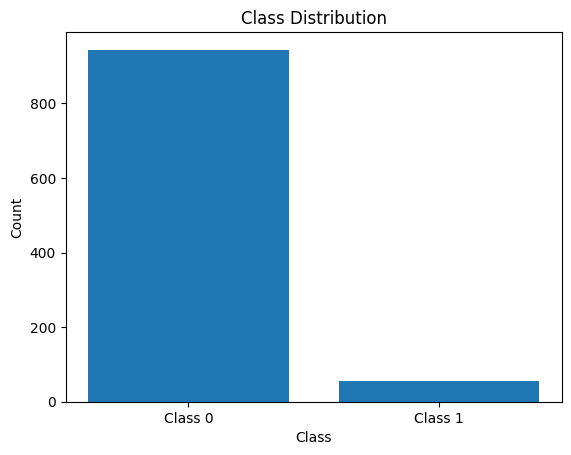

Dataset Shape: (1000, 20)
Class Distribution: [944  56]


In [3]:

# Create a synthetic dataset
X, y = make_classification(
    n_samples=1000,
    n_informative=4, n_redundant=5, n_features=20, n_clusters_per_class=3,
    n_classes=2,
    weights=[0.95, 0.05],
    random_state=42
)

# Visualize class distribution
def visualize_class_distribution(y):
    plt.bar(['Class 0', 'Class 1'], [sum(y == 0), sum(y == 1)])
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

visualize_class_distribution(y)

# Summarize dataset
print("Dataset Shape:", X.shape)
print("Class Distribution:", np.bincount(y))


Evaluate your binary classifiers using the following:
- confusion matrix,
- accuracy,
- precision,
- recall,
- F1 score,
- ROCAUC.

Please write custom functions calculating the above functions and plotting the receiver operating characteristic curve. Describe your intuition behind each metric and its suitability for imbalanced classes.



Propose, describe and implement a technique for improving the model's ability to distinguish the classes. Evaluate your approach.

## Task 4: Optimization of Neural Networks

The **backpropagation algorithm** is the foundational algorithm in deep learning. In this task You will have to go through a single iteration of said algorithm and compare the results after updating networks weights. <br>
You are given a neural network with one input layer consisting of two input nodes ${n_1, n_2}$, one hidden layer with two neurons ${n_3, n_4}$ and an output layer with a single node $n_5$. We will denote the weight connecting $n_i$ to $n_j$ as $w_{i,j}$. A bias related to $n_i$ will be denoted as $b_i$. Parameters are initialized as follows:
* $w_{1,3} = 1.5$ ; $w_{2,3} = -2.5$ ; $b_{3} = 0.3$
* $w_{1,4} = 1$ ; $w_{2,4} = -2.5$ ; $b_{4} = 0.2$
* $w_{3,5} = 4$ ; $w_{4,5} = 3$ ; $b_{5} = -0.8$ <br>

Additionally, neurons $n_3$ and $n_4$ are equipped with the sigmoid activation function: $\sigma(x) = \frac{1}{1+e^{-x}} $<br>
Your task is to use two training examples: $x = \{ (1,2), (2,0)\}$, $y = \{-1, 6\}$ to preform a single backpropagation step - preform forward calculations and propagate the received error backwards, updating the weights. After all weights have been updated, check how the predictions change, preforming additional forward pass.

## Task 5: L1 & L2 Regularization for Logistic Regression

In this task we will use a synthetic dataset generated by the function `make_classification`.

1. Use a pairplot to see the relationships between the features in the dataset.
2. Apply your logistic regression model from Task 1 on this dataset and measure its accuracy.
3. Modify your implementation to account for two regularization methods: L1 and L2 and apply them to the dataset. What can you observe?
4. Which features are selected by L1 regularization? Plot the decision boundary for these features.

(If you have not done Task 1, use `LogisticRegression` from `sklearn` to see the effects of regularization. You can get half of the points for this task if you do that.)

In [4]:

X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=5,
    n_redundant=5,
    n_classes=2,
    random_state=42
)

dataset = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(1, 21)])
dataset['Target'] = y